<center>
<img src="./images/EAN.jpg" style="width:1200px">
</center>

<center>
<img src="./images/0_intro_ml.jpg" style="width:1200px">
</center>

## Lecture 4: Representing Data and Engineering Features
*And Other Techniques for dealing with data*

## Instructors:

>Leonardo A. Espinosa, PhD. Instructor.
(*email*: leonardo.espinosaleal@arcada.fi)

> Ruben D. Acosta, MSc. Instructor.
(*email*:  rdacostav@universidadean.edu.co)

# Goal for today

* Understand the basic methods of representation data and how perform engineering feature to improve machine learning models.
* Identify the main methods and the advantages and disadvantages of those methods.

1\. <a href="#/3/1">Introduction</a>

2\. <a href="#/31/1">Encoding Categorical Values</a>
   * <a href="#/56/1">Model dependent encoding</a>
   * <a href="#/56/1">Automatic Feature Selection and AutoML</a>
 
3\. <a href="#/31/1">Imputation of missing values</a>
 
4\. <a href="#/54/1">Novelty and Outlier Detection</a>
   * <a href="#/56/1">Overview of outlier detection methods</a>.
   * <a href="#/57/1">Novelty Detection</a>.
   * <a href="#/59/1">Outlier Detection</a>.
   
5\. <a href="#/64/1">Conclusions</a>

# Introduction

* **Descriptive Analytics**, which use data aggregation and data mining to provide insight into the past and answer: “What has happened?”
* **Predictive Analytics**, which use statistical models and forecasts techniques to understand the future and answer: “What could happen?”
* **Prescriptive Analytics**, which use optimization and simulation algorithms to advice on possible outcomes and answer: “What should we do?”


<center><img src="./images/3.png" alt="Drawing" style="width: 850px;"/></center>

source: Gartner.

<center><img src="./images/descriptive_ML.png" alt="Drawing" style="width: 1000px;"/></center>

>source: Review and big data perspectives on robust data mining approaches for industrial process modeling with outliers and missing data 
(https://doi.org/10.1016/j.arcontrol.2018.09.003)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from IPython.display import display

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

# Encoding Categorical Values

> In many practical Data Science activities, the data set will contain categorical variables. These variables are typically stored as text values which represent various traits.

## The Data Set

>This particular Automobile Data Set (from UCI Machine Learning Repository) includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. 

In [37]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [38]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

### We only select the categorical values from our dataset

In [39]:

obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [40]:
obj_df[obj_df.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
27,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
63,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


### Let's do some basic Nan replacement (more about later)

In [41]:
obj_df["num_doors"].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

In [42]:
obj_df = obj_df.fillna({"num_doors": "four"})

In [43]:
obj_df

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


### *Now that the data does not have any null values, we can look at options for encoding the categorical values.*

## Approach #1 - Find and Replace

In [44]:
obj_df["num_cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64

>dictionary for cleaning up the num_doors and num_cylinders columns:

In [45]:
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [46]:
obj_df.replace(cleanup_nums, inplace=True)
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [47]:
obj_df.dtypes

make               object
fuel_type          object
aspiration         object
num_doors           int64
body_style         object
drive_wheels       object
engine_location    object
engine_type        object
num_cylinders       int64
fuel_system        object
dtype: object

## Approach #2 - Label Encoding

* convertible $\to$ 0
* hardtop $\to$ 1
* hatchback $\to$ 2
* sedan $\to$ 3
* wagon $\to$ 4


### *One trick you can use in pandas is to convert a column to a category, then use those category values for your label encoding*

In [48]:
obj_df["body_style"] = obj_df["body_style"].astype('category')
obj_df.dtypes

make                 object
fuel_type            object
aspiration           object
num_doors             int64
body_style         category
drive_wheels         object
engine_location      object
engine_type          object
num_cylinders         int64
fuel_system          object
dtype: object

In [49]:
obj_df["body_style_cat"] = obj_df["body_style"].cat.codes
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,2
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi,3
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi,3


## Approach #3 - One Hot Encoding

>Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, the value of 0 is obviously less than the value of 4 but does that really correspond to the data set in real life? Does a wagon have “4X” more weight in our calculation than the convertible?

In [50]:
pd.get_dummies(obj_df, columns=["drive_wheels"]).head()

,make,fuel_type,aspiration,num_doors,body_style,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
1,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
2,alfa-romero,gas,std,2,hatchback,front,ohcv,6,mpfi,2,0,0,1
3,audi,gas,std,4,sedan,front,ohc,4,mpfi,3,0,1,0
4,audi,gas,std,4,sedan,front,ohc,5,mpfi,3,1,0,0


The new data set contains three new columns:

* drive_wheels_4wd
* drive_wheels_rwd
* drive_wheels_fwd


### *you can pass as many category columns as you would like and choose how to label the columns using prefix*

In [51]:
pd.get_dummies(obj_df, columns=["body_style", "drive_wheels"], prefix=["body", "drive"]).head()

,make,fuel_type,aspiration,num_doors,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,alfa-romero,gas,std,2,front,dohc,4,mpfi,0,1,0,0,0,0,0,0,1
1,alfa-romero,gas,std,2,front,dohc,4,mpfi,0,1,0,0,0,0,0,0,1
2,alfa-romero,gas,std,2,front,ohcv,6,mpfi,2,0,0,1,0,0,0,0,1
3,audi,gas,std,4,front,ohc,4,mpfi,3,0,0,0,1,0,0,1,0
4,audi,gas,std,4,front,ohc,5,mpfi,3,0,0,0,1,0,1,0,0


>One hot encoding, is very useful but it can cause the number of columns to expand greatly if you have very many unique values in a column. For the number of values in this example, it is not a problem. However you can see how this gets really challenging to manage when you have many more options.

## Approach #4 - Custom Binary Encoding

>Depending on the data set, you may be able to use some combination of label encoding and one hot encoding to create a binary column that meets your needs for further analysis.

In [52]:
obj_df["engine_type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [53]:
obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, 0)

In [54]:
obj_df[["make", "engine_type", "OHC_Code"]].head()

,make,engine_type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1


This approach can be really useful if there is an option to consolidate to a simple Y/N value in a column. This also highlights how important domain knowledge is to solving the problem in the most efficient manner possible.

## Scikit-Learn for encoding

* OrdinalEncoder

Encode categorical features as an integer array. The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.

* LabelEncoder

Encode target labels with value between 0 and n_classes-1. This transformer should be used to encode target values, i.e. y, and not the input X.

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cities = ["paris", "paris", "tokyo", "amsterdam"] 
le.fit(cities)
print(list(le.classes_))

['amsterdam', 'paris', 'tokyo']


In [56]:
print(le.transform(["tokyo", "tokyo", "paris"]))

[2 2 1]


In [57]:
le.fit_transform(cities)

array([1, 1, 2, 0])

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


lb_make = LabelEncoder()
obj_df["make_code"] = lb_make.fit_transform(obj_df["make"])
obj_df[["make", "make_code"]].head(11)

,make,make_code
0,alfa-romero,0
1,alfa-romero,0
2,alfa-romero,0
3,audi,1
4,audi,1
5,audi,1
6,audi,1
7,audi,1
8,audi,1
9,audi,1


>LabelBinarizer

Binarize labels in a one-vs-all fashion. Several regression and binary classification algorithms are available in scikit-learn. A simple way to extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme.

In [59]:
from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(obj_df["body_style"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


## Advanced Approaches


In [ ]:
#! pip install category_encoders # to install the package

In [66]:
import category_encoders as ce
'''coment here PIP8'''


# Get a new clean dataframe
obj_df2 = df.select_dtypes(include=['object']).copy()

# Specify the columns to encode then fit and transform
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["engine_type"])
encoder.fit(obj_df2, verbose=1)

# Only display the first 8 columns for brevity
encoder.transform(obj_df2).head()#iloc[:,6:10].head()


,intercept,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type_0,engine_type_1,engine_type_2,engine_type_3,engine_type_4,engine_type_5,num_cylinders,fuel_system
0,1,alfa-romero,gas,std,two,convertible,rwd,front,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,four,mpfi
1,1,alfa-romero,gas,std,two,convertible,rwd,front,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,six,mpfi
3,1,audi,gas,std,four,sedan,fwd,front,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,four,mpfi
4,1,audi,gas,std,four,sedan,4wd,front,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,five,mpfi


If we try a polynomial encoding, we get a different distribution of values used to encode the columns:

In [67]:
encoder = ce.polynomial.PolynomialEncoder(cols=["engine_type"])
encoder.fit(obj_df2, verbose=1)
encoder.transform(obj_df2).iloc[:,6:15].head()

,drive_wheels,engine_location,engine_type_0,engine_type_1,engine_type_2,engine_type_3,engine_type_4,engine_type_5,num_cylinders
0,rwd,front,-0.566947,0.545545,-0.408248,0.241747,-0.109109,0.032898,four
1,rwd,front,-0.566947,0.545545,-0.408248,0.241747,-0.109109,0.032898,four
2,rwd,front,-0.377964,0.000000,0.408248,-0.564076,0.436436,-0.197386,six
3,fwd,front,-0.188982,-0.327327,0.408248,0.080582,-0.545545,0.493464,four
4,4wd,front,-0.188982,-0.327327,0.408248,0.080582,-0.545545,0.493464,five


# Conclusion

>Encoding categorical variables is an important step in the data science process. Because there are multiple approaches to encoding variables, it is important to understand the various options and how to implement them on your own data sets. The python data science ecosystem has many helpful approaches to handling these problems. I encourage you to keep these ideas in mind the next time you find yourself analyzing categorical variables. 

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

Here we are going to explore the datasets that we are going to use in our final project.
* Load the dataset into a pandas dataframe.
* describe the type of features.
* Check the categorical variables and transform them into numerical values testing different techniques.

If you don't have a dataset yet, you can use the *Student performance* datset: https://archive.ics.uci.edu/ml/datasets/Student+Performance

### Model dependent encoding

Representing data depends not only on the semantics of the data, but also in the fitted model. Linear models and tree-based models have different properties when they work with different feature representations.

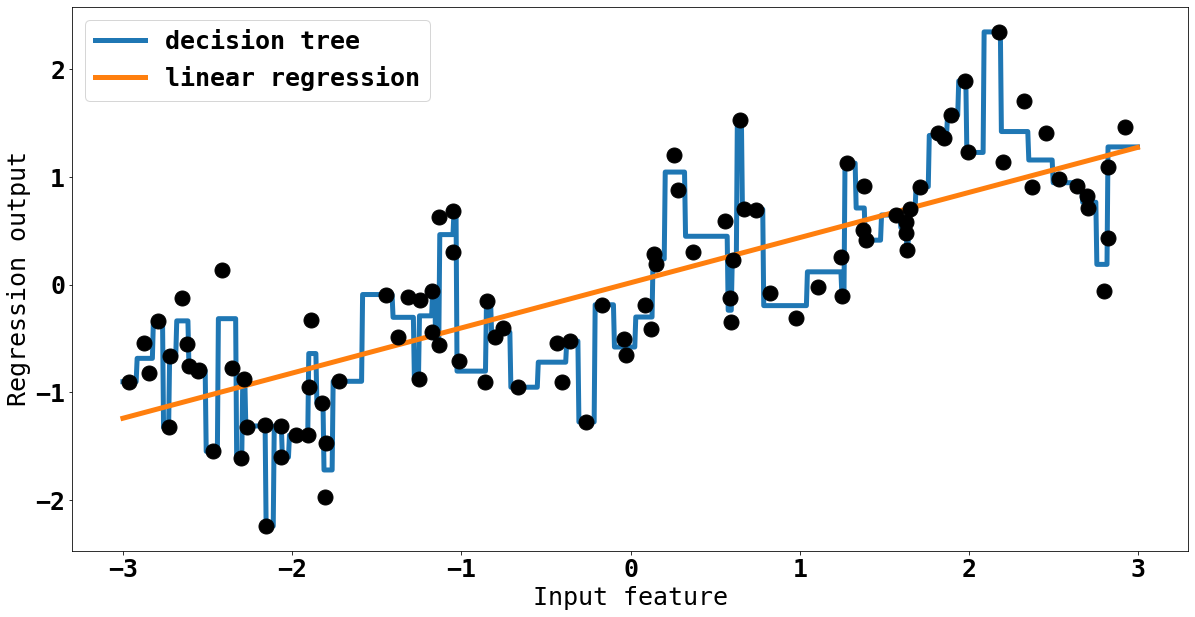

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

We can increase the complexity of the linear model to capture detailed patters using *binning*
(also known as *discretization*) of the feature

In [69]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


we record for each data point which bin it falls into:

In [70]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [71]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [72]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

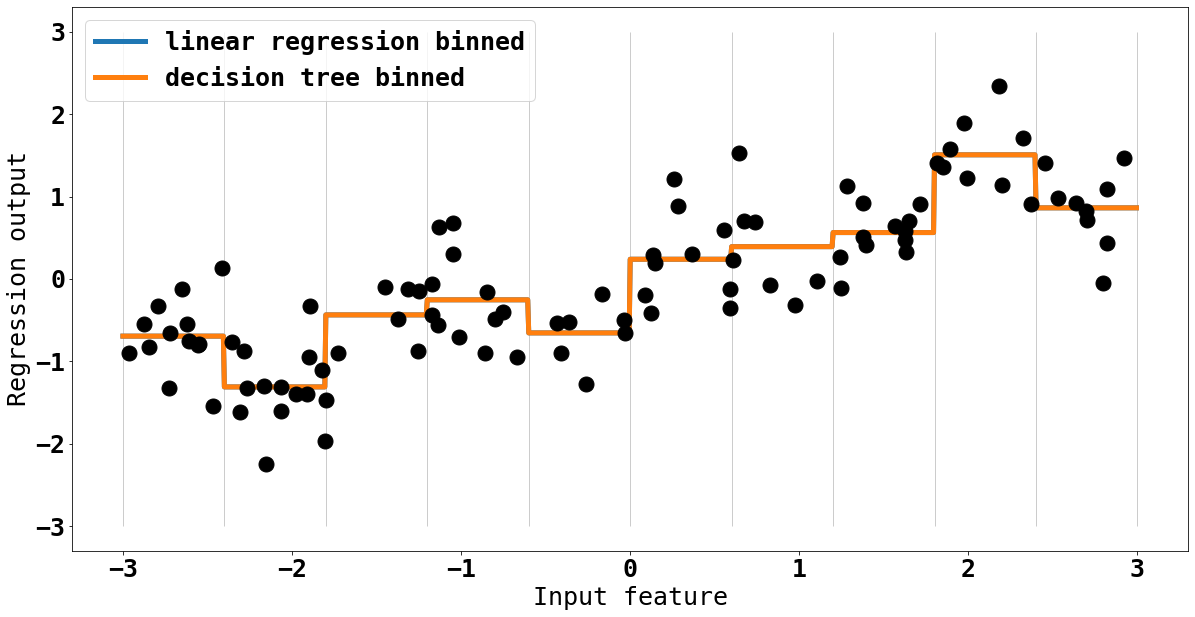

In [73]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

## Interactions and Polynomials

Another way to enrich a feature representation, particularly for linear models, is adding interaction features and polynomial features of the original data. This kind of feature engineering is often used in statistical modeling, but it’s also common in many practical machine learning applications.

One way to add a slope to the linear model on the binned data is to add the original feature (the x-axis in the plot) back in. This leads to an 11-dimensional dataset

In [74]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


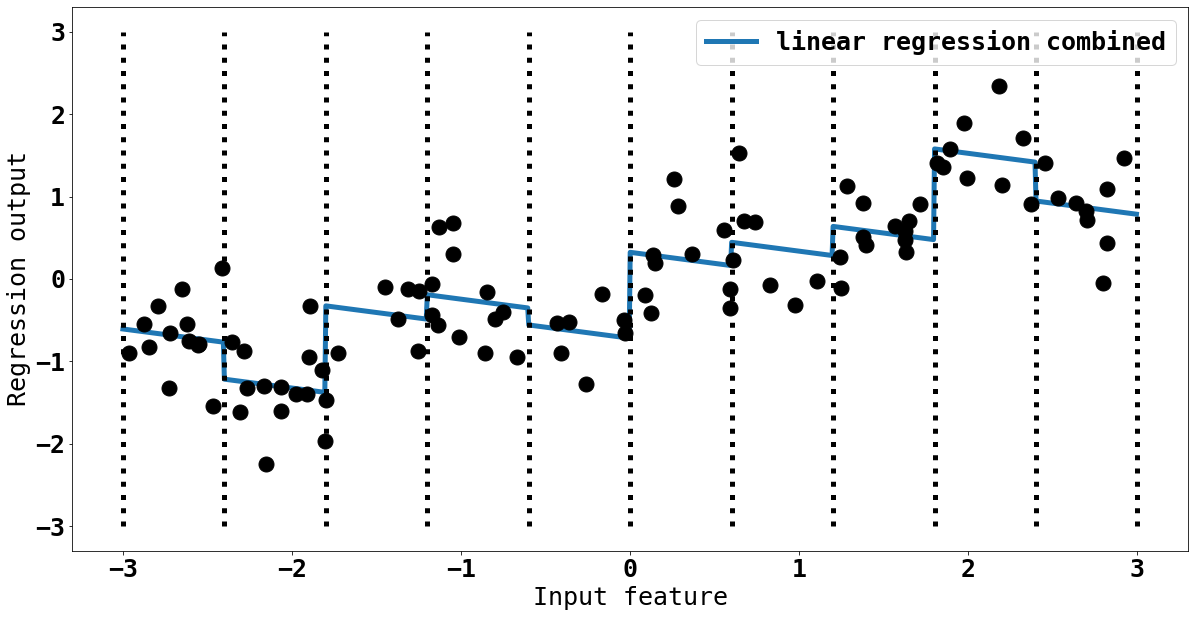

In [75]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

Adding back the original features improves the model. Increasing the amount of features by using combinations of the original seems to be the next move.

In [76]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


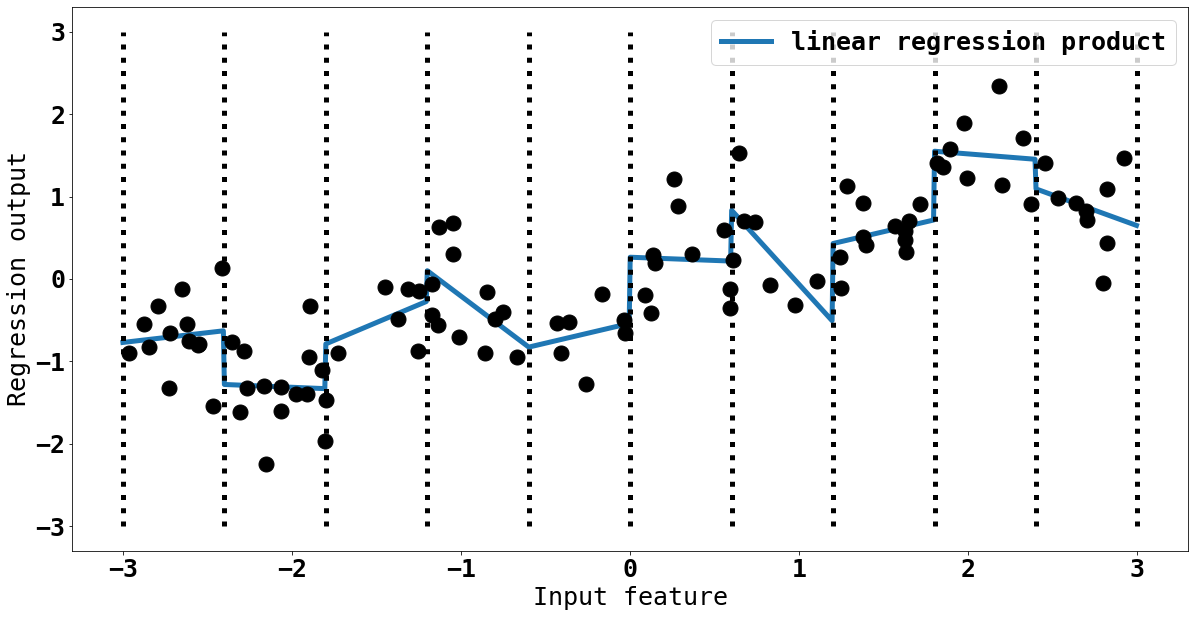

In [77]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Scikit-learn has a method to include polynomical combination of features.

In [78]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [79]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [80]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


Text(0.5, 0, 'Input feature')

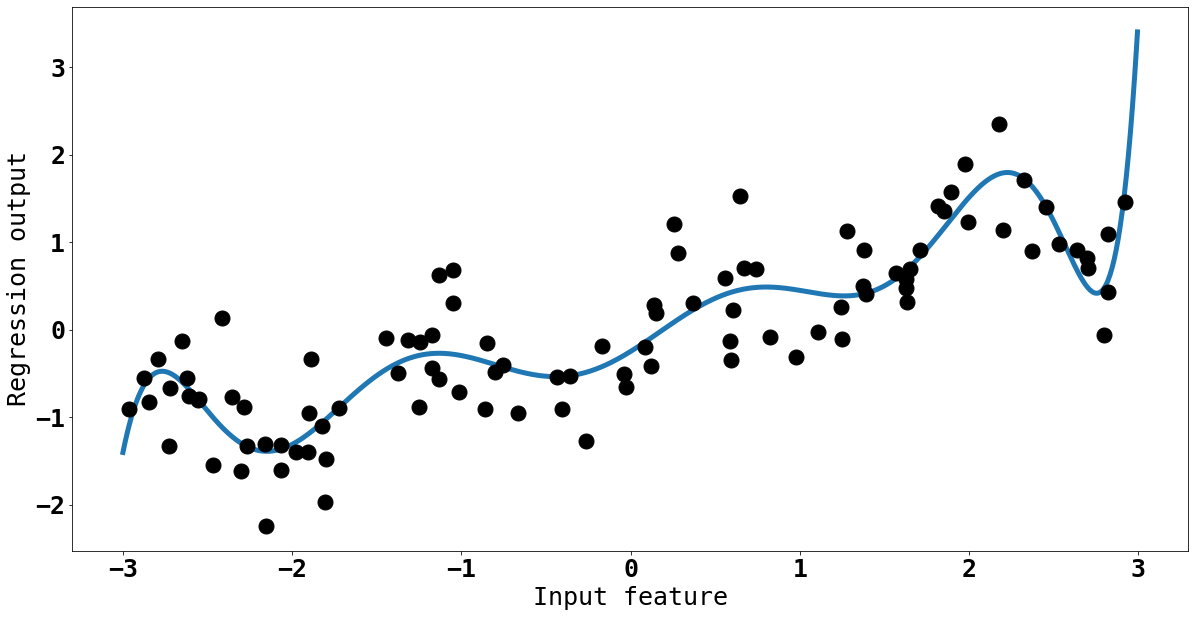

In [81]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")

Adding extra features can increase the complexity of the linear model. This method can be used when the amount of features is small.

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

Fit different polynomial features (n=5, 10 and 50) for the next dataset:

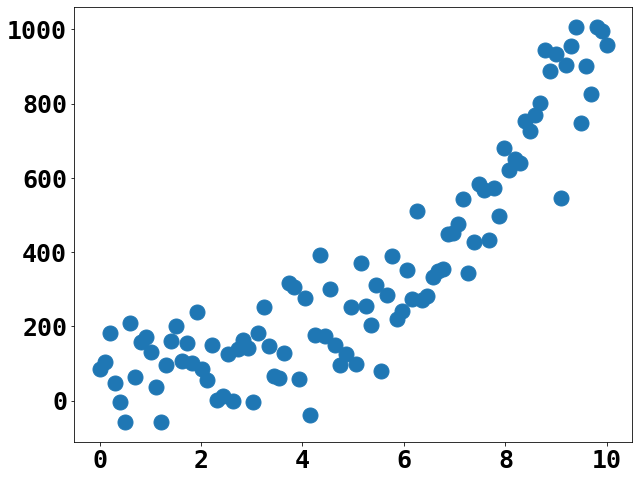

In [94]:
n_samples = 100
X = np.linspace(0, 10, 100)
X = X #.reshape
y = X ** 3 + np.random.randn(n_samples) * 100 + 100
plt.figure(figsize=(10,8))
plt.scatter(X, y)


In [91]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [95]:
reg = LinearRegression().fit(X_poly, y)

#line_poly = poly.transform(line)
#plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
#plt.plot(X[:, 0], y, 'o', c='k')
#plt.ylabel("Regression output")
#plt.xlabel("Input feature")

## Automatic Feature Selection and AutoML



* Artifically increasing the amount of features in a dataset will increase the complexity and the compuational load when any model is fitted to the new data. Also there is a risk for overfitting.

* There are different strategies for discarding generated (and in some cases original) features that are not meaningful for our dataset.
* It is a supervised method.

Scikit-learn provides with different methods, but the most used ones are: *univariate statistics*, *model-based selection*, and *iterative selection*.

In [96]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
# get deterministic random numbers

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

Text(0.5, 0, 'Sample index')

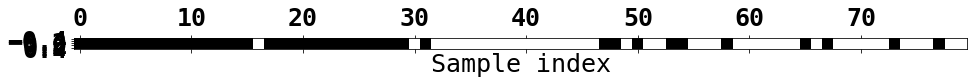

In [97]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=40)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

## AutoML
*The elephant in the room*

<center>
<img src="./images/automl.png" style="width:1200px">
</center>

* https://automl.github.io/auto-sklearn/master/
* https://github.com/EpistasisLab/tpot
* https://www.featuretools.com/
* https://mlbox.readthedocs.io/en/latest/

more here: https://pathmind.com/wiki/automl-automated-machine-learning-ai

## Conclusion

* Representing data in a way that is suitable for the machine learning algorithm is really important when creating machine learning models. 

* It is also important to engineering new features to enhance the capabilities of, in particular, linear models. These models can learn to separate non-linear data.

# Imputation of missing values

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. 

A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete).

*A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.*

### Univariate feature imputation

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. 

In [105]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[1. 2.]
 [6. 2.]
 [7. 6.]]


In [100]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=3)
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[3. 2.]
 [6. 3.]
 [7. 6.]]


## Multivariate feature imputation

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation (*caution*: experimental estimator). 

In [104]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
#imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

X_test = [[np.nan, 3], [6, np.nan], [np.nan, 6]]

# the model learns that the second feature is double the first
print(np.round(imp.fit_transform(X_test)))

[[6. 3.]
 [6. 4.]
 [6. 6.]]


## Nearest neighbors imputation

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors.

In [102]:
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## Conclusion

Handling missing data using imputation methods is very important when dealing missing data. Be careful with the results, the best strategy is to compare the results with different imputation methods.

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

Here we are going to compare the performance of one model under different imputations of the data.

1. Get the data from https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv
Hint: use pandas as df = pd.read_csv(,header=None)

Features:

    0. Number of times pregnant.
    1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    2. Diastolic blood pressure (mm Hg).
    3. Triceps skinfold thickness (mm).
    4. 2-Hour serum insulin (mu U/ml).
    5. Body mass index (weight in kg/(height in m)^2).
    6. Diabetes pedigree function.
    7. Age (years).
    8. Class variable (0 or 1).

In [185]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv",header=None)

In [186]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Inspect the data using *describe*

3. Replace the 0 values in the first 5 columns as:
 *df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.nan)*

4. remove the nan rows using 
*df.dropna(inplace=True)*. Attention! This actions will modify your origina dataframe.

5. Fit a binary classifier for predicting the 8 column.

6. Perform some imputation in the dataset obtained in the part 3. Fit your model again, do the accuracy improves?

In [187]:
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.nan)

In [188]:
df_nan = df
df_nan

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [189]:
df_nan.dropna(inplace=True)

In [190]:
df_nan.shape

(392, 9)

In [191]:
y_nan = df_nan[[8]].values

In [192]:
X_nan = df_nan[[0,1,2,3,4,5,6,7]].values

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_nan, y_nan, test_size=0.33, random_state=42)

lg = LogisticRegression()
lg.fit(X_train,y_train)

/home/leonardo/miniconda3/envs/env-ean/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/leonardo/miniconda3/envs/env-ean/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
lg.score(X_test,y_test)

0.7769230769230769

In [195]:
pac = np.array([[4,89.0,66.0,23.0,134.0,28.1,0.167,50]])

lg.predict(pac)

array([0])

In [196]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

Xall = df[[0,1,2,3,4,5,6,7]].values
yall = df[[8]].values

X_imp = imp.fit_transform(Xall)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, yall, test_size=0.33, random_state=42)

lg = LogisticRegression()
lg.fit(X_train,y_train)

/home/leonardo/miniconda3/envs/env-ean/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/leonardo/miniconda3/envs/env-ean/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
lg.score(X_test,y_test)

0.7769230769230769

# Novelty and Outlier Detection


>Many applications require being able to decide whether a new observation belongs to the same distribution as existing observations (it is an inlier), or should be considered as different (it is an outlier). Often, this ability is used to clean real data sets. 

## Outlier detection:
>The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.
## Novelty detection:
>The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

In [ ]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


def get_outliers():
    #print(__doc__)

    matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

    # Example settings
    n_samples = 300
    outliers_fraction = 0.15
    n_outliers = int(outliers_fraction * n_samples)
    n_inliers = n_samples - n_outliers

    # define outlier/anomaly detection methods to be compared
    anomaly_algorithms = [
        ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
        ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                          gamma=0.1)),
        ("Isolation Forest", IsolationForest(behaviour='new',
                                             contamination=outliers_fraction,
                                             random_state=42)),
        ("Local Outlier Factor", LocalOutlierFactor(
            n_neighbors=35, contamination=outliers_fraction))]

    # Define datasets
    blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
    datasets = [
        make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
                   **blobs_params)[0],
        make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
                   **blobs_params)[0],
        make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
                   **blobs_params)[0],
        4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
              np.array([0.5, 0.25])),
        14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

    # Compare given classifiers under given settings
    xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                         np.linspace(-7, 7, 150))

    plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    plot_num = 1
    rng = np.random.RandomState(42)

    for i_dataset, X in enumerate(datasets):
        # Add outliers
        X = np.concatenate([X, rng.uniform(low=-6, high=6,
                           size=(n_outliers, 2))], axis=0)

        for name, algorithm in anomaly_algorithms:
            t0 = time.time()
            algorithm.fit(X)
            t1 = time.time()
            plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)

            # fit the data and tag outliers
            if name == "Local Outlier Factor":
                y_pred = algorithm.fit_predict(X)
            else:
                y_pred = algorithm.fit(X).predict(X)

            # plot the levels lines and the points
            if name != "Local Outlier Factor":  # LOF does not implement predict
                Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

            colors = np.array(['#377eb8', '#ff7f00'])
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

            plt.xlim(-7, 7)
            plt.ylim(-7, 7)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1

    plt.show()

In [ ]:
# Overview of outlier detection methods
get_outliers()

### Novelty Detection

>Consider a data set of observations from the same distribution described by features. Consider now that we add one more observation to that data set. Is the new observation so different from the others that we can doubt it is regular? (i.e. does it come from the same distribution?) Or on the contrary, is it so similar to the other that we cannot distinguish it from the original observations? This is the question addressed by the novelty detection tools and methods.

In [ ]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 22}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['lines.markersize'] = 30.

plt.rcParams['legend.fontsize'] = 30

def get_one_class_svm():

    xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
    # Generate train data
    X = 0.3 * np.random.randn(100, 2)
    X_train = np.r_[X + 2, X - 2]
    # Generate some regular novel observations
    X = 0.3 * np.random.randn(20, 2)
    X_test = np.r_[X + 2, X - 2]
    # Generate some abnormal novel observations
    X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

    # fit the model
    clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
    clf.fit(X_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    y_pred_outliers = clf.predict(X_outliers)
    n_error_train = y_pred_train[y_pred_train == -1].size
    n_error_test = y_pred_test[y_pred_test == -1].size
    n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

    # plot the line, the points, and the nearest vectors to the plane
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.title("Novelty Detection")
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
    a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

    s = 50
    b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
    b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                     edgecolors='k')
    c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                    edgecolors='k')
    plt.axis('tight')
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.legend([a.collections[0], b1, b2, c],
               ["learned frontier", "training observations",
                "new regular observations", "new abnormal observations"],
               loc="upper left",
               prop=matplotlib.font_manager.FontProperties(size=11))
    plt.xlabel(
        "error train: %d/200 ; errors novel regular: %d/40 ; "
        "errors novel abnormal: %d/40"
        % (n_error_train, n_error_test, n_error_outliers))
    plt.show()

In [ ]:
# One-class SVM with non-linear kernel
get_one_class_svm()

## Outlier Detection

>Outlier detection is similar to novelty detection in the sense that the goal is to separate a core of regular observations from some polluting ones, called outliers. Yet, in the case of outlier detection, we don’t have a clean data set representing the population of regular observations that can be used to train any tool.

In [179]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet


def get_mahalanobis():

    n_samples = 125
    n_outliers = 25
    n_features = 2

    # generate data
    gen_cov = np.eye(n_features)
    gen_cov[0, 0] = 2.
    X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
    # add some outliers
    outliers_cov = np.eye(n_features)
    outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
    X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

    # fit a Minimum Covariance Determinant (MCD) robust estimator to data
    robust_cov = MinCovDet().fit(X)

    # compare estimators learnt from the full data set with true parameters
    emp_cov = EmpiricalCovariance().fit(X)

    # #############################################################################
    # Display results
    fig = plt.figure()
    plt.subplots_adjust(hspace=-.1, wspace=.4, top=.95, bottom=.05)

    # Show data set
    subfig1 = plt.subplot(3, 1, 1)
    inlier_plot = subfig1.scatter(X[:, 0], X[:, 1],
                                  color='black', label='inliers')
    outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                                   color='red', label='outliers')
    subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
    subfig1.set_title("Mahalanobis distances of a contaminated data set:")

    # Show contours of the distance functions
    xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                         np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
    zz = np.c_[xx.ravel(), yy.ravel()]

    mahal_emp_cov = emp_cov.mahalanobis(zz)
    mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
    emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                      cmap=plt.cm.PuBu_r,
                                      linestyles='dashed')

    mahal_robust_cov = robust_cov.mahalanobis(zz)
    mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
    robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                     cmap=plt.cm.YlOrBr_r, linestyles='dotted')

    subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                    inlier_plot, outlier_plot],
                   ['MLE dist', 'robust dist', 'inliers', 'outliers'],
                   loc="upper right", borderaxespad=0)
    plt.xticks(())
    plt.yticks(())

    # Plot the scores for each point
    emp_mahal = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
    subfig2 = plt.subplot(2, 2, 3)
    subfig2.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
    subfig2.plot(np.full(n_samples - n_outliers, 1.26),
                 emp_mahal[:-n_outliers], '+k', markeredgewidth=1)
    subfig2.plot(np.full(n_outliers, 2.26),
                 emp_mahal[-n_outliers:], '+k', markeredgewidth=1)
    subfig2.axes.set_xticklabels(('inliers', 'outliers'), size=15)
    subfig2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
    subfig2.set_title("1. from non-robust estimates\n(Maximum Likelihood)")
    plt.yticks(())

    robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
    subfig3 = plt.subplot(2, 2, 4)
    subfig3.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]],
                    widths=.25)
    subfig3.plot(np.full(n_samples - n_outliers, 1.26),
                 robust_mahal[:-n_outliers], '+k', markeredgewidth=1)
    subfig3.plot(np.full(n_outliers, 2.26),
                 robust_mahal[-n_outliers:], '+k', markeredgewidth=1)
    subfig3.axes.set_xticklabels(('inliers', 'outliers'), size=15)
    subfig3.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
    subfig3.set_title("2. from robust estimates\n(Minimum Covariance Determinant)")
    plt.yticks(())

    plt.show()



/home/leonardo/miniconda3/envs/env-ean/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/leonardo/miniconda3/envs/env-ean/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


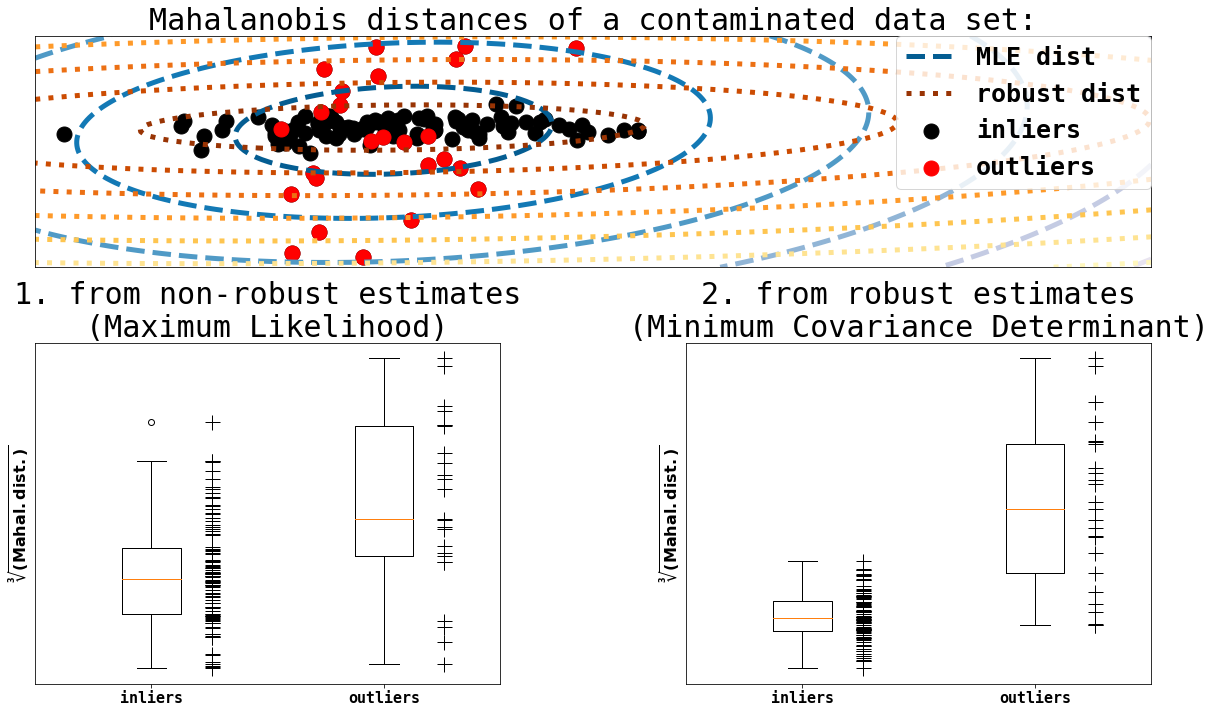

In [180]:
get_mahalanobis()

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

def get_isolation_forest():

    rng = np.random.RandomState(42)

    # Generate train data
    X = 0.3 * rng.randn(100, 2)
    X_train = np.r_[X + 2, X - 2]
    # Generate some regular novel observations
    X = 0.3 * rng.randn(20, 2)
    X_test = np.r_[X + 2, X - 2]
    # Generate some abnormal novel observations
    X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

    # fit the model
    clf = IsolationForest(behaviour='new', max_samples=100,
                          random_state=rng, contamination='auto')
    clf.fit(X_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    y_pred_outliers = clf.predict(X_outliers)

    # plot the line, the samples, and the nearest vectors to the plane
    xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.title("IsolationForest")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

    b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                     s=20, edgecolor='k')
    b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                     s=20, edgecolor='k')
    c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                    s=20, edgecolor='k')
    plt.axis('tight')
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.legend([b1, b2, c],
               ["training observations",
                "new regular observations", "new abnormal observations"],
               loc="upper left")
    plt.show()

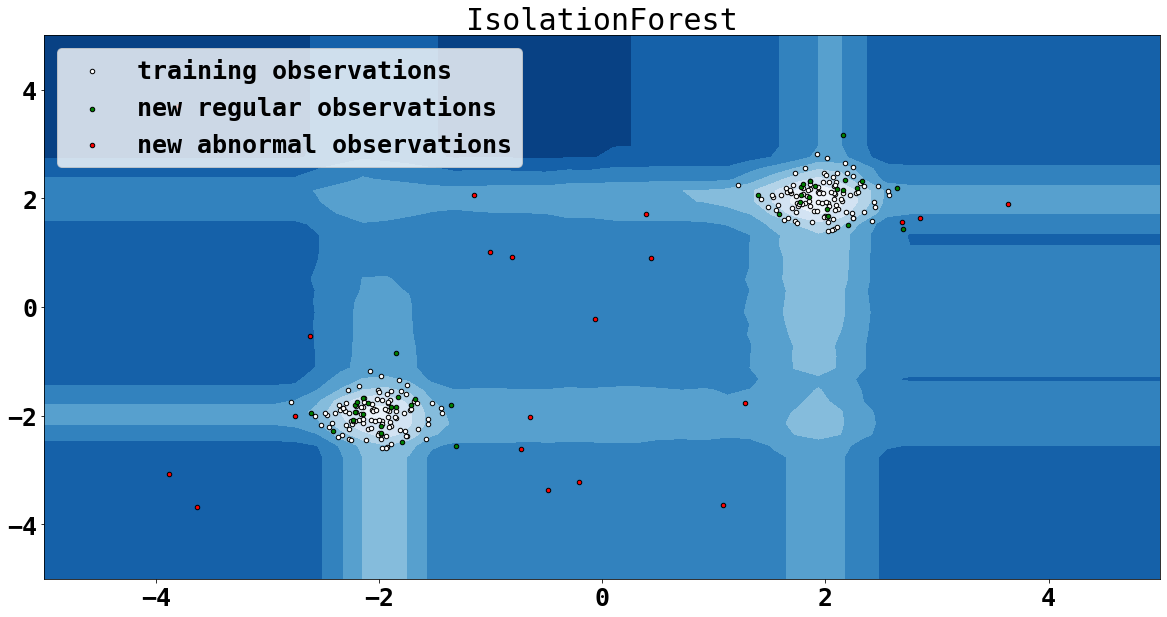

In [182]:
get_isolation_forest()

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

#print(__doc__)

def get_local_outlier_factor():

    np.random.seed(42)

    # Generate train data
    X_inliers = 0.3 * np.random.randn(100, 2)
    X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

    # Generate some outliers
    X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
    X = np.r_[X_inliers, X_outliers]

    n_outliers = len(X_outliers)
    ground_truth = np.ones(len(X), dtype=int)
    ground_truth[-n_outliers:] = -1

    # fit the model for outlier detection (default)
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    # use fit_predict to compute the predicted labels of the training samples
    # (when LOF is used for outlier detection, the estimator has no predict,
    # decision_function and score_samples methods).
    y_pred = clf.fit_predict(X)
    n_errors = (y_pred != ground_truth).sum()
    X_scores = clf.negative_outlier_factor_

    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
    # plot circles with radius proportional to the outlier scores
    radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
    plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
                facecolors='none', label='Outlier scores')
    plt.axis('tight')
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.xlabel("prediction errors: %d" % (n_errors))
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.show()

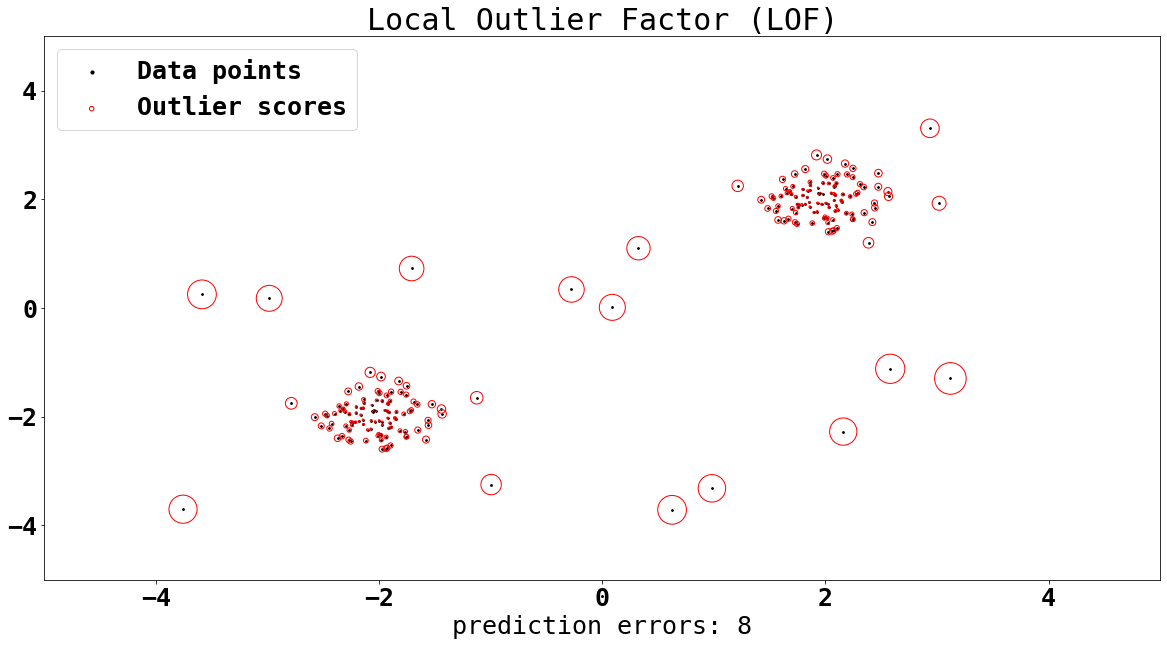

In [184]:
get_local_outlier_factor()

<center>
<img src="./images/00_questions.jpg" style="width:1200px">
</center>

# Conclusions

Technique for detecting outliers and novelties are of paramount importance in the preprocessing of data and also for descriptive analytics. Be careful with the interpretation of the data

<center>
<img src="./images/rm.jpg" style="width:1200px">
    Feature engineering sometimes is treated as art, not a science.
</center>